<a href="https://colab.research.google.com/github/aaalexlit/wandb_notebooks/blob/main/W%26B_01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install wandb -qq
!wget -nc https://raw.githubusercontent.com/wandb/edu/main/mlops-001/lesson1/params.py
!wget -nc https://raw.githubusercontent.com/wandb/edu/main/mlops-001/lesson1/utils.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [5]:
from fastai.vision.all import * 
import params
import wandb

In [6]:
URL = 'https://storage.googleapis.com/wandb_course/bdd_simple_1k.zip'


In [8]:
path = Path(untar_data(URL, force_download=True))

In [18]:
path.ls()

(#3) [Path('/root/.fastai/data/bdd_simple_1k/LICENSE.txt'),Path('/root/.fastai/data/bdd_simple_1k/labels'),Path('/root/.fastai/data/bdd_simple_1k/images')]

In [19]:
(path/'labels').ls()

(#1001) [Path('/root/.fastai/data/bdd_simple_1k/labels/977b8906-7e0dbdbd_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/7461b407-00000000_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/7b3ee12a-26590001_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/2cc27873-1866aa6a_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/6bbebf9e-1ee89b43_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/a91b7555-00001090_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/8accdada-6b91f21f_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/0ea7f502-16d9fb4e_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/1fbf13dd-e90a8282_mask.png'),Path('/root/.fastai/data/bdd_simple_1k/labels/0f1a2d28-bfa30001_mask.png')...]

In [17]:
(path/'images').ls()

(#1000) [Path('/root/.fastai/data/bdd_simple_1k/images/b5fd8bf6-fa9be3ca.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/4f2c67cc-2117b7d0.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/0ceb02a1-9d25dd06.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/1e15cae7-5d932386.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/5af8ba04-e0e43238.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/9dccd5bd-67d455b3.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/81cd9c75-00000000.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/8f71e64e-6c9b9af0.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/a91b7555-00000140.jpg'),Path('/root/.fastai/data/bdd_simple_1k/images/63b0747b-00000000.jpg')...]

In [29]:
def label_func(fname):
    return (fname.parent.parent/"labels")/f"{fname.stem}_mask.png"
    
 

In [34]:
def get_classes_per_image(mask_data, class_labels):
    unique = list(np.unique(mask_data))
    result_dict = {}
    for _class in class_labels.keys():
        result_dict[class_labels[_class]] = int(_class in unique)
    return result_dict

In [59]:
   
def _create_table(image_files, class_labels):
  "Create a table with the dataset"
  labels = [str(class_labels[_lab]) for _lab in list(class_labels)]
  table = wandb.Table(columns=["File_Name", "P1", "P2", "Images", "Dataset"] + labels)

  for i, image_file in progress_bar(enumerate(image_files), total=len(image_files)):
    image = Image.open(image_file)
    mask_data = np.array(Image.open(label_func(image_file)))
    class_in_image = get_classes_per_image(mask_data, class_labels)
    table.add_data(
        image_file.stem,
        image_file.stem.split('-')[0],
        image_file.stem.split('-')[1],
        wandb.Image(
            image,
            masks={
                'predictions': {
                    'mask_data': mask_data,
                    'class_labels': class_labels,
                }
            }
        ),
        'bdd1k',
        *[class_in_image[_lab] for _lab in labels]
    )
  return table

In [25]:
path_to_first_image = (path/'images').ls()[0]

In [30]:
image = Image.open(path_to_first_image)
mask_data = np.array(Image.open(label_func(path_to_first_image)))

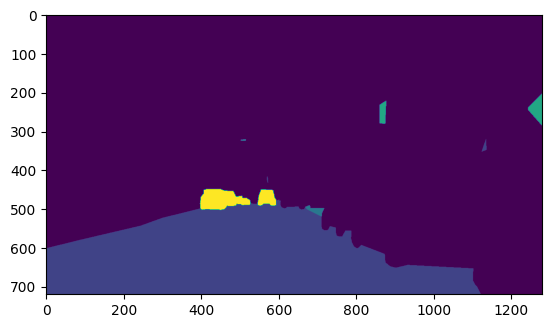

In [32]:
import matplotlib.pyplot as plt
plt.imshow(mask_data)

In [35]:
get_classes_per_image(mask_data, params.BDD_CLASSES)

{'background': 1,
 'road': 1,
 'traffic light': 1,
 'traffic sign': 1,
 'person': 0,
 'vehicle': 1,
 'bicycle': 0}

In [38]:
path_to_first_image.stem

'b5fd8bf6-fa9be3ca'

In [39]:
[str(params.BDD_CLASSES[_lab]) for _lab in list(params.BDD_CLASSES)]

['background',
 'road',
 'traffic light',
 'traffic sign',
 'person',
 'vehicle',
 'bicycle']

In [44]:
list(params.BDD_CLASSES.values())

['background',
 'road',
 'traffic light',
 'traffic sign',
 'person',
 'vehicle',
 'bicycle']

# Start a new W&B run

In [45]:
run = wandb.init(project=params.WANDB_PROJECT,
                 entity=params.ENTITY,
                 job_type="upload"
                 )

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Create and Artifact

In [47]:
artifact = wandb.Artifact(params.RAW_DATA_AT, type='raw_data')

# Add file to artifact

In [48]:
artifact.add_file(path/"LICENSE.txt", name="LICENSE.txt")

ArtifactManifestEntry(path='LICENSE.txt', digest='X+6ZFkDOlnKesJCNt20yRg==', ref=None, birth_artifact_id=None, size=1594, extra={}, local_path='/root/.local/share/wandb/artifacts/staging/tmpui14gl30')

# Add dirs with images and labels to the artifact

In [49]:
artifact.add_dir(path/'images', name='images')

wandb: Adding directory to artifact (/root/.fastai/data/bdd_simple_1k/images)... Done. 1.4s


In [50]:
artifact.add_dir(path/'labels', name='labels')

wandb: Adding directory to artifact (/root/.fastai/data/bdd_simple_1k/labels)... Done. 0.8s


# Read image files and create a table

In [51]:
image_files = get_image_files(path/"images", recurse=False)


In [60]:
table = _create_table(image_files, params.BDD_CLASSES)


# Add table to artifact

In [61]:
artifact.add(table, 'eda_table')

ArtifactManifestEntry(path='eda_table.table.json', digest='uf0Wqi1Oy2EGZwQ4PoM7SA==', ref=None, birth_artifact_id=None, size=610046, extra={}, local_path='/root/.local/share/wandb/artifacts/staging/tmp2p97_id9')

# Log artifact to W&B and finish run

In [62]:
run.log_artifact(artifact)
run.finish()